In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

In [69]:
import pandas as pd
df = pd.read_excel('C:/Db Analytics/Database Change Classification/SampleData170619.xlsx')
df.head()

,Task Description,category_ref
0,failover the only database moss aicomplianceex...,[4.2.2.k]
1,hello hp team task 1 please verify if the data...,[4.2.2.k]
2,provide support during dhs failover process ve...,[4.2.2.k]
3,chg0000328576 application failback change fail...,[4.2.2.k]
4,move the database frfat1p1 prd to orginal node...,[4.2.2.k]


In [70]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [71]:
df['Task Description'] = df['Task Description'].map(lambda com : clean_text(com))
df['Task Description'][6]

'1 please failover the database vision db events from prod londbnvnetp2 to dr londbnvnetb2 and inform to perry austin before failover so that application will be shutdown 2 run the script on dr db use vision db update t server info set ipaddress 10 235 199 43 where servername application server go 3 confirm this to secops systems perry austin db com 4 secops systems will then confirm verification task after testing application that the failover has been successful and the implementation is complete'

In [72]:
# Remove Missing values
# Add a column encoding the product as an integer

from io import StringIO
col = ['category_ref', 'Task Description']
df = df[col]
df = df[pd.notnull(df['Task Description'])]
df.columns = ['category', 'task_description']
df['category_id'] = df['category'].factorize()[0]
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.sample(5)

,category,task_description,category_id
414,[4.2.2.d],rename cda orm 1801 to cda orm 1801 and rename...,13
49,[4.2.2.nn],oracle bestshore team task data export from ln...,8
36,[0.0.0.-],modify user groups permission revoke sysadmin ...,7
450,[4.2.2.q],we would like to setup full database refresh w...,5
154,[10.2.1.a],add space to the database as mentioned below d...,14


In [73]:
category_id_df

,category,category_id
0,[4.2.2.k],0
9,[4..3.1.g],1
12,[4.1.1.d],2
13,[4.2.2.mmm],3
14,[4.2.2.b],4
15,[4.2.2.q],5
18,[4.2.2.ss],6
20,[0.0.0.-],7
38,[4.2.2.nn],8
39,[4.2.2.a],9


In [74]:
category_to_id

{'[4.2.2.k]': 0,
 '[4..3.1.g]': 1,
 '[4.1.1.d]': 2,
 '[4.2.2.mmm]': 3,
 '[4.2.2.b]': 4,
 '[4.2.2.q]': 5,
 '[4.2.2.ss]': 6,
 '[0.0.0.-]': 7,
 '[4.2.2.nn]': 8,
 '[4.2.2.a]': 9,
 '[4.1.1.a]': 10,
 '[4.1.1.p]': 11,
 '[4.2.2.uu]': 12,
 '[4.2.2.d]': 13,
 '[10.2.1.a]': 14,
 '[12.1.1.e]': 15,
 '[4.2.2.i]': 16,
 '[4.2.2.g]': 17,
 '[4.2.2.kk]': 18,
 '[4.1.1.q]': 19,
 '[4.3.1.b]': 20,
 '[4.2.2.v]': 21,
 '[4.3.1.d]': 22,
 '[4.3.1.k]': 23,
 '[4.3.1.i]': 24,
 '[4.2.2.ii]': 25,
 '[4.1.1.c]': 26,
 '[4.3.1.c]': 27,
 '[4.3.1.h]': 28}

In [75]:
id_to_category

{0: '[4.2.2.k]',
 1: '[4..3.1.g]',
 2: '[4.1.1.d]',
 3: '[4.2.2.mmm]',
 4: '[4.2.2.b]',
 5: '[4.2.2.q]',
 6: '[4.2.2.ss]',
 7: '[0.0.0.-]',
 8: '[4.2.2.nn]',
 9: '[4.2.2.a]',
 10: '[4.1.1.a]',
 11: '[4.1.1.p]',
 12: '[4.2.2.uu]',
 13: '[4.2.2.d]',
 14: '[10.2.1.a]',
 15: '[12.1.1.e]',
 16: '[4.2.2.i]',
 17: '[4.2.2.g]',
 18: '[4.2.2.kk]',
 19: '[4.1.1.q]',
 20: '[4.3.1.b]',
 21: '[4.2.2.v]',
 22: '[4.3.1.d]',
 23: '[4.3.1.k]',
 24: '[4.3.1.i]',
 25: '[4.2.2.ii]',
 26: '[4.1.1.c]',
 27: '[4.3.1.c]',
 28: '[4.3.1.h]'}

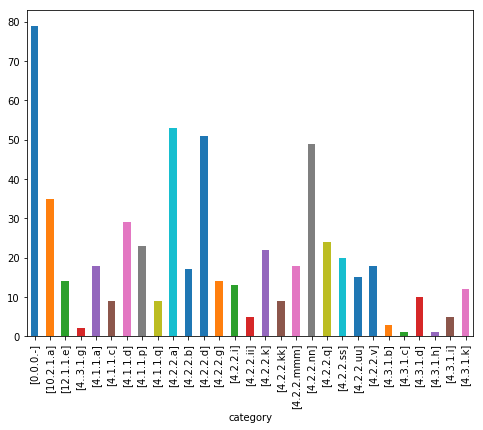

In [76]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('category').task_description.count().plot.bar(ylim=0)
plt.show()

In [77]:
# Model: Bag-of-words

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.task_description).toarray()
labels = df.category
features.shape

(578, 927)

In [78]:
# Use 'sklearn.feature_selection.chi2' to find the terms that are the most correlated with each of the products

from sklearn.feature_selection import chi2
import numpy as np
N = 2
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("--> '{}':".format(category))
  print("  . Most Correlated Unigrams are :\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most Correlated Bigrams are :\n. {}".format('\n. '.join(bigrams[-N:])))

--> '[0.0.0.-]':
  . Most Correlated Unigrams are :
. enabled
. xdb
  . Most Correlated Bigrams are :
. dump files
. em12 dhs
--> '[10.2.1.a]':
  . Most Correlated Unigrams are :
. enabled
. xdb
  . Most Correlated Bigrams are :
. dump files
. em12 dhs
--> '[12.1.1.e]':
  . Most Correlated Unigrams are :
. enabled
. xdb
  . Most Correlated Bigrams are :
. dump files
. em12 dhs
--> '[4..3.1.g]':
  . Most Correlated Unigrams are :
. enabled
. xdb
  . Most Correlated Bigrams are :
. dump files
. em12 dhs
--> '[4.1.1.a]':
  . Most Correlated Unigrams are :
. enabled
. xdb
  . Most Correlated Bigrams are :
. dump files
. em12 dhs
--> '[4.1.1.c]':
  . Most Correlated Unigrams are :
. enabled
. xdb
  . Most Correlated Bigrams are :
. dump files
. em12 dhs
--> '[4.1.1.d]':
  . Most Correlated Unigrams are :
. enabled
. xdb
  . Most Correlated Bigrams are :
. dump files
. em12 dhs
--> '[4.1.1.p]':
  . Most Correlated Unigrams are :
. enabled
. xdb
  . Most Correlated Bigrams are :
. dump files


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['task_description'], df['category'],test_size=0.25, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [98]:
X_train.shape

(433,)

In [99]:
X_test.shape
# (191, 927)

(145,)

In [81]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['[0.0.0.-]']


In [82]:
df[df['task_description'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,category,task_description,category_id


In [83]:
# clf = LinearSVC().fit(X_train_tfidf, y_train)

In [84]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['[4.2.2.a]']


In [85]:
df[df['task_description'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,category,task_description,category_id


C:\Users\sekh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sekh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sekh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sekh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.

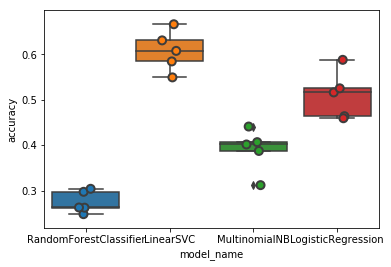

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [102]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.608022
LogisticRegression        0.510702
MultinomialNB             0.389797
RandomForestClassifier    0.274845
Name: accuracy, dtype: float64

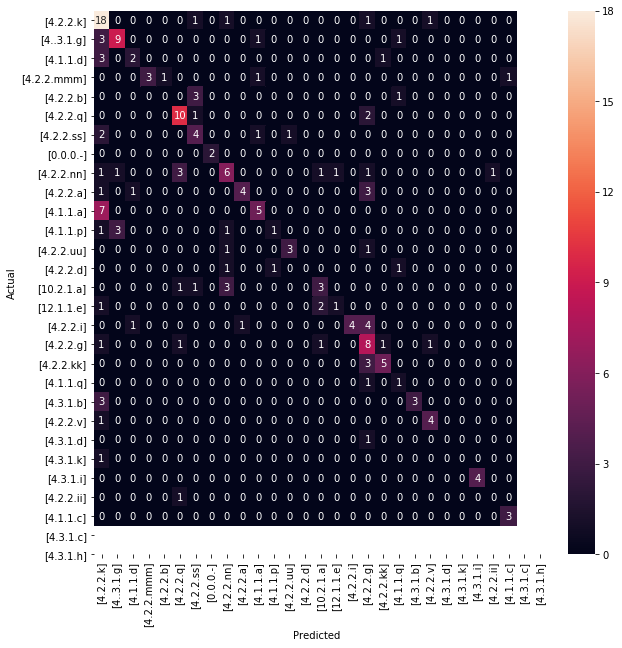

In [104]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [90]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 1:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['category', 'task_description']])
      print('')

'[4..3.1.g]' predicted as '[4.2.2.k]' : 3 examples.


,category,task_description



'[4.1.1.d]' predicted as '[4.2.2.k]' : 3 examples.


,category,task_description



'[4.2.2.ss]' predicted as '[4.2.2.k]' : 2 examples.


,category,task_description



'[4.2.2.nn]' predicted as '[4.2.2.k]' : 1 examples.


,category,task_description



'[4.2.2.a]' predicted as '[4.2.2.k]' : 1 examples.


,category,task_description



'[4.1.1.a]' predicted as '[4.2.2.k]' : 7 examples.


,category,task_description



'[4.1.1.p]' predicted as '[4.2.2.k]' : 1 examples.


,category,task_description



'[12.1.1.e]' predicted as '[4.2.2.k]' : 1 examples.


,category,task_description



'[4.2.2.g]' predicted as '[4.2.2.k]' : 1 examples.


,category,task_description



'[4.3.1.b]' predicted as '[4.2.2.k]' : 3 examples.


,category,task_description



'[4.2.2.v]' predicted as '[4.2.2.k]' : 1 examples.


,category,task_description



'[4.3.1.k]' predicted as '[4.2.2.k]' : 1 examples.


,category,task_description


IndexError: index 27 is out of bounds for axis 0 with size 27

In [38]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# '[0.0.0.-]':
  . Top unigrams:
       . install
       . components
  . Top bigrams:
       . acfs patch
       . prod server
# '[10.2.1.a]':
  . Top unigrams:
       . attached
       . step
  . Top bigrams:
       . password change
       . execute attached
# '[12.1.1.e]':
  . Top unigrams:
       . dr
       . failback
  . Top bigrams:
       . failover database
       . change initiator
# '[4.1.1.a]':
  . Top unigrams:
       . job
       . backups
  . Top bigrams:
       . run script
       . sql prd
# '[4.1.1.c]':
  . Top unigrams:
       . removed
       . unused
  . Top bigrams:
       . unused oracle
       . uninstall unused
# '[4.1.1.d]':
  . Top unigrams:
       . stats
       . trigger
  . Top bigrams:
       . logon trigger
       . task confirmation
# '[4.1.1.p]':
  . Top unigrams:
       . change
       . set
  . Top bigrams:
       . alter set
       . user profile
# '[4.1.1.q]':
  . Top unigrams:
       . manual
       . node
  . Top bigrams:
       . alter user
   